In [97]:
import pandas as pd
file_path1 = r'C:\Users\DELL\Desktop\gdp_data.xlsx'
xls1 = pd.ExcelFile(file_path1)
xls1

In [98]:
gdp = pd.read_excel(file_path1,sheet_name = 'Data',skiprows=3)

In [99]:
#list all sheet names to identifythe oneyou need
sheet_name = xls1.sheet_names
print(sheet_name)

['Data', 'Metadata - Countries', 'Metadata - Indicators']


In [100]:
#load specific sheet needed
gdp_df = pd.read_excel(file_path1,sheet_name ='Data', skiprows=3)
gdp_df= gdp_df.drop(['Country Code','Indicator Name','Indicator Code'],axis = 1)
gdp_df

,Country Name,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,21375.269123,22050.589873,24105.524121,24978.221674,25832.925565,27665.299480,29011.639057,25740.770230,24452.588739,...,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN
1,Africa Eastern and Southern,633.520201,819.986705,994.193854,1130.168938,1235.847125,1379.746756,1439.240924,1404.535948,1622.684093,...,1678.553610,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957
2,Afghanistan,182.174038,199.643227,221.830531,254.115276,274.015392,376.318300,382.533807,453.387385,562.499222,...,626.512929,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,NaN
3,Africa Western and Central,627.095915,706.476561,850.083582,1008.341766,1246.349454,1421.444644,1685.806936,1467.789174,1680.141063,...,2248.518426,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285
4,Angola,872.657631,982.805587,1254.696119,1900.723809,2597.963587,3121.348725,4081.717506,3123.698885,3586.663694,...,5011.984427,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,2873.385256,2790.536618,2981.178657,...,3902.530841,3520.782075,3759.472855,4009.353811,4384.188680,4416.029253,4310.934002,5270.550640,5290.977397,5943.125714
262,"Yemen, Rep.",543.900068,583.369653,668.854619,784.757981,867.835963,956.230477,1153.536422,1045.805578,1249.063085,...,1557.601406,1488.416289,1069.817009,893.716501,701.714865,NaN,NaN,NaN,NaN,NaN
263,South Africa,2708.423333,4095.683700,5268.278576,5893.187076,6139.581618,6662.062785,6251.877427,6444.186840,8059.562798,...,6965.137897,6204.929901,5735.066787,6734.475153,7067.724165,6702.526617,5753.066494,7073.612754,6766.481254,6253.161613
264,Zambia,399.099078,452.286582,556.050052,720.446505,1065.596417,1133.436158,1393.519491,1150.941746,1469.361450,...,1724.576220,1307.909649,1249.923143,1495.752138,1475.199883,1268.120941,958.264901,1134.713454,1456.901570,1369.129365


In [101]:
# Function to reshape the data
def reshape_data(df, value_name):
    df_melted = df.melt(id_vars=['Country Name'], var_name='Date', value_name=value_name)
    df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%Y')
    df_melted.set_index('Date', inplace=True)
    return df_melted

In [103]:
#Reshape each dataset
gdp_df = reshape_data(gdp_df, 'GDP')

In [104]:
gdp_df

,Country Name,GDP
Date,,
2002-01-01,Aruba,21375.269123
2002-01-01,Africa Eastern and Southern,633.520201
2002-01-01,Afghanistan,182.174038
2002-01-01,Africa Western and Central,627.095915
2002-01-01,Angola,872.657631
...,...,...
2023-01-01,Kosovo,5943.125714
2023-01-01,"Yemen, Rep.",NaN
2023-01-01,South Africa,6253.161613


**INFLATION DATA LOADING**

In [106]:
file_path2 = r'C:\Users\DELL\Desktop\Inflation rates.xlsx'
xls2 = pd.ExcelFile(file_path2)
xls2

In [107]:
#list all sheets names to identify
sheet_name = xls2.sheet_names
print(sheet_name)

['Data', 'Sheet1', 'Metadata - Countries', 'Metadata - Indicators']


In [112]:
#load specific sheet needed
inf_df = pd.read_excel(file_path2,sheet_name ='Data', skiprows=3)
inf_df= inf_df.drop(['Country Code','Indicator Name','Indicator Code'],axis = 1)
inf_df

,Country Name,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Albania,7.770526,0.484003,2.280019,2.366582,2.370728,2.932682,3.320871,2.266922,3.626047,...,1.625865,1.896174,1.275432,1.986661,2.028060,1.411091,1.620887,2.041472,6.725203,NaN
1,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,1.810358,1.355554,2.061206,2.299138,1.441549,2.168555,3.215950,0.506309,1.813534,...,1.605812,0.896563,0.891592,2.081269,1.998380,1.530896,1.381911,2.766667,8.546870,7.814134
4,Belgium,1.645214,1.588964,2.097283,2.781433,1.791208,1.823056,4.489444,-0.053146,2.189299,...,0.340003,0.561429,1.973853,2.125971,2.053165,1.436820,0.740792,2.440249,9.597512,4.049011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Ukraine,0.757421,5.179678,9.048068,13.569576,9.052525,12.838780,25.226462,15.881192,9.372931,...,12.071856,48.699865,13.912710,14.438323,10.951856,7.886717,2.732492,9.363139,20.183637,12.849022
71,United States,1.586032,2.270095,2.677237,3.392747,3.225944,2.852672,3.839100,-0.355546,1.640043,...,1.622223,0.118627,1.261583,2.130110,2.442583,1.812210,1.233584,4.697859,8.002800,4.116338
72,"Venezuela, RB",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.080941,28.187465,...,62.168650,121.738085,254.948535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,Kosovo,NaN,-1.084813,-1.064727,-1.385189,0.621647,4.358497,9.350418,-2.410264,3.480508,...,0.428958,-0.536929,0.273169,1.488234,1.053798,2.675992,0.198228,3.353691,11.580510,4.944227


In [113]:
#Reshape each dataset
inf_df = reshape_data(inf_df, 'INF')

In [115]:
inf_df

,Country Name,INF
Date,,
2002-01-01,Albania,7.770526
2002-01-01,Andorra,NaN
2002-01-01,Argentina,NaN
2002-01-01,Austria,1.810358
2002-01-01,Belgium,1.645214
...,...,...
2023-01-01,Ukraine,12.849022
2023-01-01,United States,4.116338
2023-01-01,"Venezuela, RB",NaN


**POVERTY INDEX**

In [122]:
file_path3 = r'C:\Users\DELL\Desktop\Poverty index .xlsx'
xls3 = pd.ExcelFile(file_path3)
xls3

In [124]:
#list all sheets names to identify
sheet_name = xls3.sheet_names
print(sheet_name)

['Data', 'Sheet1', 'Metadata - Countries', 'Metadata - Indicators']


In [125]:
#load specific sheet needed
pi_df = pd.read_excel(file_path3,sheet_name ='Data', skiprows=3)
pi_df= pi_df.drop(['Country Code','Indicator Name','Indicator Code'],axis = 1)
pi_df

,Country Name,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.36,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.32,NaN,13.95,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.96,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.98,NaN,7.55,NaN,NaN,NaN
4,Albania,16.20000,NaN,NaN,11.5,NaN,NaN,8.20000,NaN,NaN,...,12.50000,6.5,6.9,6.6,4.60,3.2,3.20,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,"Yemen, Rep.",NaN,NaN,NaN,43.2,NaN,NaN,NaN,NaN,NaN,...,44.70000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1549,"Yemen, Rep.",NaN,NaN,NaN,21.1,NaN,NaN,NaN,NaN,NaN,...,21.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,"Yemen, Rep.",NaN,NaN,NaN,15.9,NaN,NaN,NaN,NaN,NaN,...,15.30000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1551,"Yemen, Rep.",NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,...,11.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
#Reshape each dataset
pi_df = reshape_data(pi_df, 'PI')

In [127]:
pi_df

,Country Name,PI
Date,,
2002-01-01,Albania,NaN
2002-01-01,Albania,NaN
2002-01-01,Albania,NaN
2002-01-01,Albania,NaN
2002-01-01,Albania,16.2
...,...,...
2023-01-01,"Yemen, Rep.",NaN
2023-01-01,"Yemen, Rep.",NaN
2023-01-01,"Yemen, Rep.",NaN


**ENERGY CONSUMPTION DATA LOADING**

In [129]:
file_path4 = r'C:\Users\DELL\Desktop\Energy consumption .xlsx'
xls4 = pd.ExcelFile(file_path4)
xls4

In [130]:
#list all sheets names to identify
sheet_name = xls4.sheet_names
print(sheet_name)

['Data', 'Sheet2', 'Sheet1', 'Metadata - Countries', 'Metadata - Indicators']


In [132]:
#load specific sheet needed
cons_df = pd.read_excel(file_path4,sheet_name ='Data', skiprows=3)
cons_df= cons_df.drop(['Country Code','Indicator Name','Indicator Code'],axis = 1)
cons_df

,Country Name,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Albania,1578.165919,1469.264539,1797.525487,1722.072850,1218.360146,1213.124369,1617.744156,1835.684072,1943.343354,...,2309.366503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,7427.656445,7695.080037,7808.157792,7977.681597,8244.401952,8207.474739,8233.014833,7944.796096,8382.711154,...,8355.841952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Belgium,8311.892679,8411.900657,8576.223497,8509.997073,8683.671285,8614.679503,8521.496740,7903.955479,8393.949623,...,7709.123078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Benin,67.009492,63.453036,69.034932,72.275091,73.429382,77.939249,84.320734,85.690793,92.952250,...,97.128135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Middle East & North Africa (IDA & IBRD countries),1144.590420,1190.231636,1256.341776,1280.326304,1352.472798,1385.593739,1420.324763,1452.791423,1576.463188,...,1642.158273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Uruguay,2010.621088,1893.237935,1934.938157,2004.421785,2226.782675,2421.401342,2597.623711,2674.516380,2821.349434,...,3093.173789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,United States,13296.182299,13307.492009,13388.589711,13704.577048,13583.266959,13657.452828,13663.427968,12913.714688,13394.902755,...,12993.965579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,"Venezuela, RB",2733.456795,2640.909294,2772.150927,2860.910236,2971.432341,2988.726979,3091.913666,3058.575626,3165.068096,...,2705.604013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
#Reshape each dataset
cons_df = reshape_data(cons_df, 'CONS')

In [135]:
cons_df

,Country Name,CONS
Date,,
2002-01-01,Albania,1578.165919
2002-01-01,Andorra,NaN
2002-01-01,Austria,7427.656445
2002-01-01,Belgium,8311.892679
2002-01-01,Benin,67.009492
...,...,...
2023-01-01,Middle East & North Africa (IDA & IBRD countries),NaN
2023-01-01,Uruguay,NaN
2023-01-01,United States,NaN


**PREODUCTION DATA**

In [137]:
file_path5 = r'C:\Users\DELL\Desktop\Energy production per capital.xlsx'
xls5 = pd.ExcelFile(file_path5)
xls5

In [138]:
Sheet_name=xls5.sheet_names
Sheet_name

['Sheet1', 'Sheet2', 'Sheet3']

In [139]:
# Read the first sheet of the Excel file, skipping the first three rows and using the fourth row as header
df = pd.read_excel(file_path5, sheet_name=0, skiprows=3)

# Function to reshape the data
def reshape_data(df, value_name):
    df_melted = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                        var_name='Date',
                        value_name=value_name)
    df_melted['Date'] = df_melted['Date'].astype(str).str[:4]  # Keep only the year part
    df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%Y', errors='coerce')
    df_melted.dropna(subset=['Date'], inplace=True)  # Drop rows where 'Date' conversion failed
    df_melted.set_index('Date', inplace=True)
    return df_melted

# Example usage
prod_df = reshape_data(df, 'Value')
prod_df

,Country Name,Country Code,Indicator Name,Indicator Code,Value
Date,,,,,
2002-01-01,Colombia,COL,Ores and metals exports (% of merchandise expo...,TX.VAL.MMTL.ZS.UN,8.256998e-01
2002-01-01,Colombia,COL,Fuel exports (% of merchandise exports),TX.VAL.FUEL.ZS.UN,3.591876e+01
2002-01-01,Colombia,COL,Gross savings (current US$),NY.GNS.ICTR.CD,1.363941e+10
2002-01-01,Colombia,COL,GNI per capita growth (annual %),NY.GNP.PCAP.KD.ZG,7.319293e-01
2002-01-01,Colombia,COL,"GNI, PPP (constant 2021 international $)",NY.GNP.MKTP.PP.KD,4.373735e+11
...,...,...,...,...,...
2023-01-01,Ecuador,ECU,GDP per unit of energy use (constant 2021 PPP ...,EG.GDP.PUSE.KO.PP.KD,NaN
2023-01-01,Ecuador,ECU,"Electricity production from renewable sources,...",EG.ELC.RNWX.KH,0.000000e+00
2023-01-01,Ecuador,ECU,Electricity production from natural gas source...,EG.ELC.NGAS.ZS,0.000000e+00


In [140]:
prod_df=prod_df.drop(['Country Code','Indicator Name','Indicator Code'],axis = 1)
prod_df

,Country Name,Value
Date,,
2002-01-01,Colombia,8.256998e-01
2002-01-01,Colombia,3.591876e+01
2002-01-01,Colombia,1.363941e+10
2002-01-01,Colombia,7.319293e-01
2002-01-01,Colombia,4.373735e+11
...,...,...
2023-01-01,Ecuador,NaN
2023-01-01,Ecuador,0.000000e+00
2023-01-01,Ecuador,0.000000e+00


In [143]:
prod_df['Production'] = prod_df['Value']
prod_dff=prod_df.drop(columns=['Value'])
prod_dff

,Country Name,Production
Date,,
2002-01-01,Colombia,8.256998e-01
2002-01-01,Colombia,3.591876e+01
2002-01-01,Colombia,1.363941e+10
2002-01-01,Colombia,7.319293e-01
2002-01-01,Colombia,4.373735e+11
...,...,...
2023-01-01,Ecuador,NaN
2023-01-01,Ecuador,0.000000e+00
2023-01-01,Ecuador,0.000000e+00


**Electricity production**

In [146]:
file_path6 = r'C:\Users\DELL\Desktop\electricity-generation.xlsx'
xlx6 = pd.ExcelFile(file_path6)
xlx6

In [147]:
elect_df = pd.read_excel(file_path6,sheet_name = 0 )

In [149]:
elect_df['Date'] = pd.to_datetime(elect_df['Year'], format='%Y')

In [150]:
elect_df = elect_df.drop(columns=['Year'])

In [151]:
elect_df

,Entity,Code,Electricity generation - TWh,Date
0,Africa,NaN,258.98584,1985-01-01
1,Africa,NaN,270.10968,1986-01-01
2,Africa,NaN,280.25952,1987-01-01
3,Africa,NaN,295.29565,1988-01-01
4,Africa,NaN,306.64783,1989-01-01
...,...,...,...,...
1792,Yemen,YEM,3.49000,2018-01-01
1793,Yemen,YEM,3.28000,2019-01-01
1794,Yemen,YEM,2.94000,2020-01-01
1795,Yemen,YEM,3.02000,2021-01-01


In [154]:
elec_df = elect_df.drop(columns=['Code'])
elect_df

,Entity,Code,Electricity generation - TWh,Date
0,Africa,NaN,258.98584,1985-01-01
1,Africa,NaN,270.10968,1986-01-01
2,Africa,NaN,280.25952,1987-01-01
3,Africa,NaN,295.29565,1988-01-01
4,Africa,NaN,306.64783,1989-01-01
...,...,...,...,...
1792,Yemen,YEM,3.49000,2018-01-01
1793,Yemen,YEM,3.28000,2019-01-01
1794,Yemen,YEM,2.94000,2020-01-01
1795,Yemen,YEM,3.02000,2021-01-01


In [155]:
elect_df['Country Name'] = elect_df['Entity']
elect_dff=elect_df.drop(columns=['Entity','Code'])
elect_dff = elect_dff.reindex(columns=['Date','Country Name','Electricity generation - TWh'])
elect_dff

,Date,Country Name,Electricity generation - TWh
0,1985-01-01,Africa,258.98584
1,1986-01-01,Africa,270.10968
2,1987-01-01,Africa,280.25952
3,1988-01-01,Africa,295.29565
4,1989-01-01,Africa,306.64783
...,...,...,...
1792,2018-01-01,Yemen,3.49000
1793,2019-01-01,Yemen,3.28000
1794,2020-01-01,Yemen,2.94000
1795,2021-01-01,Yemen,3.02000


In [159]:
# Concatenate the DataFrames along the merged_df
merged_df =pd.merge(inf_df, gdp_df,on = ['Date','Country Name'])
merged_df=pd.merge(merged_df,pi_df, on =['Date','Country Name'])
merged_df=pd.merge(merged_df,prod_dff, on =['Date','Country Name'])
merged_df=pd.merge(merged_df,elect_dff,on = ['Date','Country Name'])

merged_df=pd.merge(merged_df,cons_df, on =['Date','Country Name'])
merged_df


,Date,Country Name,INF,GDP,PI,Production,Electricity generation - TWh,CONS
0,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226
1,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226
2,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226
3,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226
4,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226
...,...,...,...,...,...,...,...,...
422657,2023-01-01,Ecuador,2.215688,6533.351504,NaN,NaN,33.55,NaN
422658,2023-01-01,Ecuador,2.215688,6533.351504,NaN,0.0,33.55,NaN
422659,2023-01-01,Ecuador,2.215688,6533.351504,NaN,0.0,33.55,NaN
422660,2023-01-01,Ecuador,2.215688,6533.351504,NaN,0.0,33.55,NaN


In [160]:
merged_df.head()

,Date,Country Name,INF,GDP,PI,Production,Electricity generation - TWh,CONS
0,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226
1,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226
2,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226
3,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226
4,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226


In [161]:
merged_df.describe()

,Date,INF,GDP,PI,Production,Electricity generation - TWh,CONS
count,422662,422662.000000,422662.000000,242005.000000,2.599730e+05,422662.000000,248239.000000
mean,2012-08-12 03:46:17.078611456,2.670891,24021.460899,15.206323,6.636165e+12,637.007206,3952.842408
min,2002-01-01 00:00:00,-2.096998,1020.950491,-2.590000,-3.207000e+12,3.790000,166.102493
25%,2007-01-01 00:00:00,1.019377,5941.234709,1.600000,4.590988e-01,23.160000,1177.569983
50%,2013-01-01 00:00:00,2.276185,15261.797591,10.400000,1.119240e+01,62.270000,3820.371057
75%,2018-01-01 00:00:00,3.416268,35397.363281,22.500000,6.502629e+02,85.220000,6489.126257
max,2023-01-01 00:00:00,15.100165,99994.938020,87.900000,1.572658e+15,9459.590000,8360.576135
std,NaN,2.610576,23622.693636,15.730720,7.051187e+13,1733.310058,2658.673982


In [162]:
# Remove duplicate columns
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
merged_df

,Date,Country Name,INF,GDP,PI,Production,Electricity generation - TWh,CONS
0,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226
1,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226
2,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226
3,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226
4,2002-01-01,Switzerland,0.642712,42458.738468,NaN,NaN,65.41,8031.432226
...,...,...,...,...,...,...,...,...
422657,2023-01-01,Ecuador,2.215688,6533.351504,NaN,NaN,33.55,NaN
422658,2023-01-01,Ecuador,2.215688,6533.351504,NaN,0.0,33.55,NaN
422659,2023-01-01,Ecuador,2.215688,6533.351504,NaN,0.0,33.55,NaN
422660,2023-01-01,Ecuador,2.215688,6533.351504,NaN,0.0,33.55,NaN


In [163]:
merged_df
# Identify numeric columns
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in numeric columns with the mean
merged_df_filled_mean =merged_df.copy()
merged_df_filled_mean[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())

print("Data after filling missing values with the mean:")
print(merged_df_filled_mean.info())

Data after filling missing values with the mean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422662 entries, 0 to 422661
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date                          422662 non-null  datetime64[ns]
 1   Country Name                  422662 non-null  object        
 2   INF                           422662 non-null  float64       
 3   GDP                           422662 non-null  float64       
 4   PI                            422662 non-null  float64       
 5   Production                    422662 non-null  float64       
 6   Electricity generation - TWh  422662 non-null  float64       
 7   CONS                          422662 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 25.8+ MB
None


In [164]:
# Verify that there are no missing values in numeric columns
missing_values_after = merged_df_filled_mean.isnull().sum()
print(missing_values_after[missing_values_after > 0])

Series([], dtype: int64)


<Axes: >

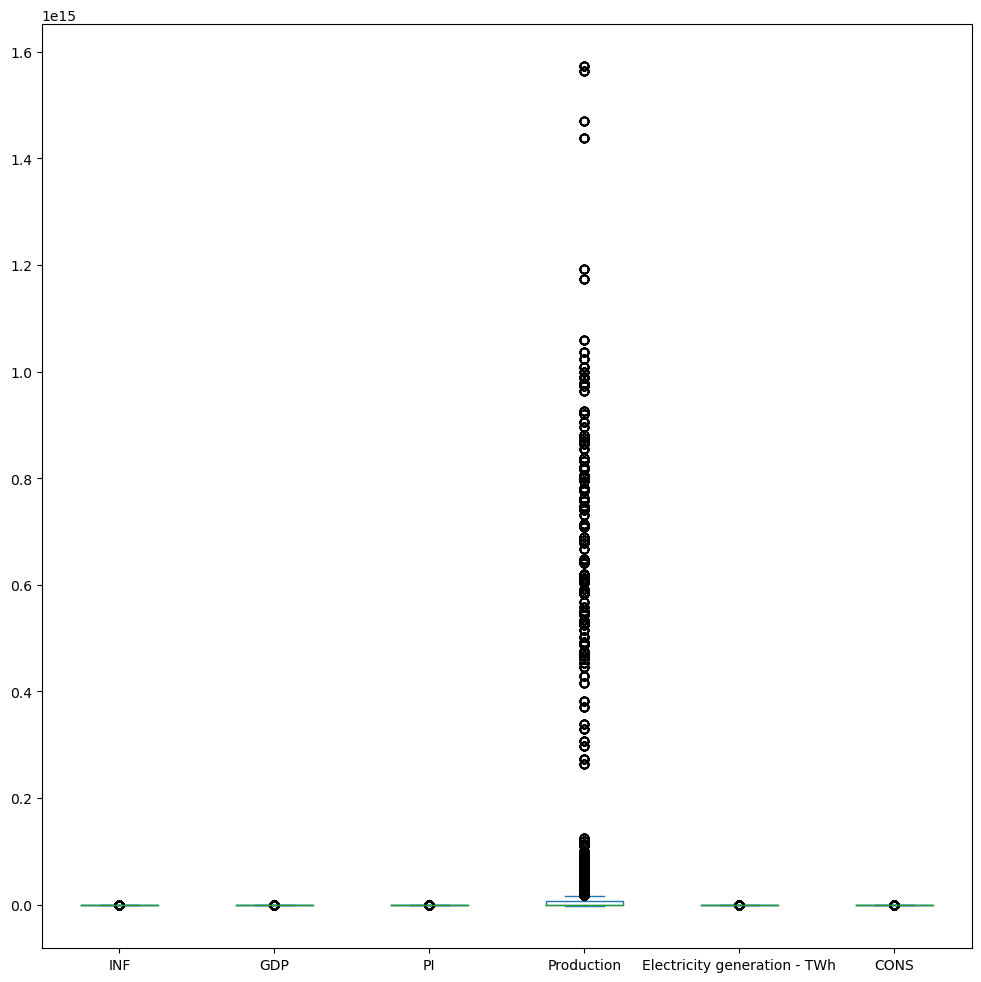

In [165]:
merged_df_filled_mean.plot(kind = 'box',vert = True,figsize =(12,12))

In [166]:
df = merged_df_filled_mean
numeric_df = df.select_dtypes(include= ['int','float'])
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)
iqr = q3-q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('upper limit is', upper_limit) 
print('lower limits',lower_limit)

upper limit is INF                             7.011604e+00
GDP                             7.958156e+04
PI                              2.526581e+01
Production                      1.659041e+13
Electricity generation - TWh    1.783100e+02
CONS                            5.535339e+03
dtype: float64
lower limits INF                            -2.575959e+00
GDP                            -3.824296e+04
PI                             -1.559485e+00
Production                     -9.954248e+12
Electricity generation - TWh   -6.993000e+01
CONS                            1.969786e+03
dtype: float64


In [167]:
# find outliers in the dataset
# Align df with limits before comparison
numeric_df, lower_limit = numeric_df.align(lower_limit, axis=1, copy=False)
numeric_df, upper_limit = numeric_df.align(upper_limit, axis=1, copy=False)

# Find outliers
outliers = df.loc[(numeric_df > upper_limit).any(axis=1) | (numeric_df < lower_limit).any(axis=1)]

# Display results
outliers

,Date,Country Name,INF,GDP,PI,Production,Electricity generation - TWh,CONS
0,2002-01-01,Switzerland,0.642712,42458.738468,15.206323,6.636165e+12,65.41,8031.432226
1,2002-01-01,Switzerland,0.642712,42458.738468,15.206323,6.636165e+12,65.41,8031.432226
2,2002-01-01,Switzerland,0.642712,42458.738468,15.206323,6.636165e+12,65.41,8031.432226
3,2002-01-01,Switzerland,0.642712,42458.738468,15.206323,6.636165e+12,65.41,8031.432226
4,2002-01-01,Switzerland,0.642712,42458.738468,15.206323,6.636165e+12,65.41,8031.432226
...,...,...,...,...,...,...,...,...
422217,2023-01-01,Ecuador,2.215688,6533.351504,49.800000,6.636165e+12,33.55,3952.842408
422218,2023-01-01,Ecuador,2.215688,6533.351504,49.800000,0.000000e+00,33.55,3952.842408
422219,2023-01-01,Ecuador,2.215688,6533.351504,49.800000,0.000000e+00,33.55,3952.842408
422220,2023-01-01,Ecuador,2.215688,6533.351504,49.800000,0.000000e+00,33.55,3952.842408


In [93]:
# trimout outliers
new_df = df.loc[(numeric_df < upper_limit).all(axis=1) & (numeric_df > lower_limit).all(axis=1)]
new_df

,Date,Country Name,INF,GDP,PI,Production,Electricity generation - TWh,CONS
5355,2002-01-01,Cyprus,2.801155,16093.214844,15.206323,6.636165e+12,3.79,3683.590004
5356,2002-01-01,Cyprus,2.801155,16093.214844,15.206323,6.636165e+12,3.79,3683.590004
5357,2002-01-01,Cyprus,2.801155,16093.214844,15.206323,6.636165e+12,3.79,3683.590004
5358,2002-01-01,Cyprus,2.801155,16093.214844,15.206323,6.636165e+12,3.79,3683.590004
5359,2002-01-01,Cyprus,2.801155,16093.214844,15.206323,6.636165e+12,3.79,3683.590004
...,...,...,...,...,...,...,...,...
422657,2023-01-01,Ecuador,2.215688,6533.351504,15.206323,6.636165e+12,33.55,3952.842408
422658,2023-01-01,Ecuador,2.215688,6533.351504,15.206323,0.000000e+00,33.55,3952.842408
422659,2023-01-01,Ecuador,2.215688,6533.351504,15.206323,0.000000e+00,33.55,3952.842408
422660,2023-01-01,Ecuador,2.215688,6533.351504,15.206323,0.000000e+00,33.55,3952.842408


<Axes: >

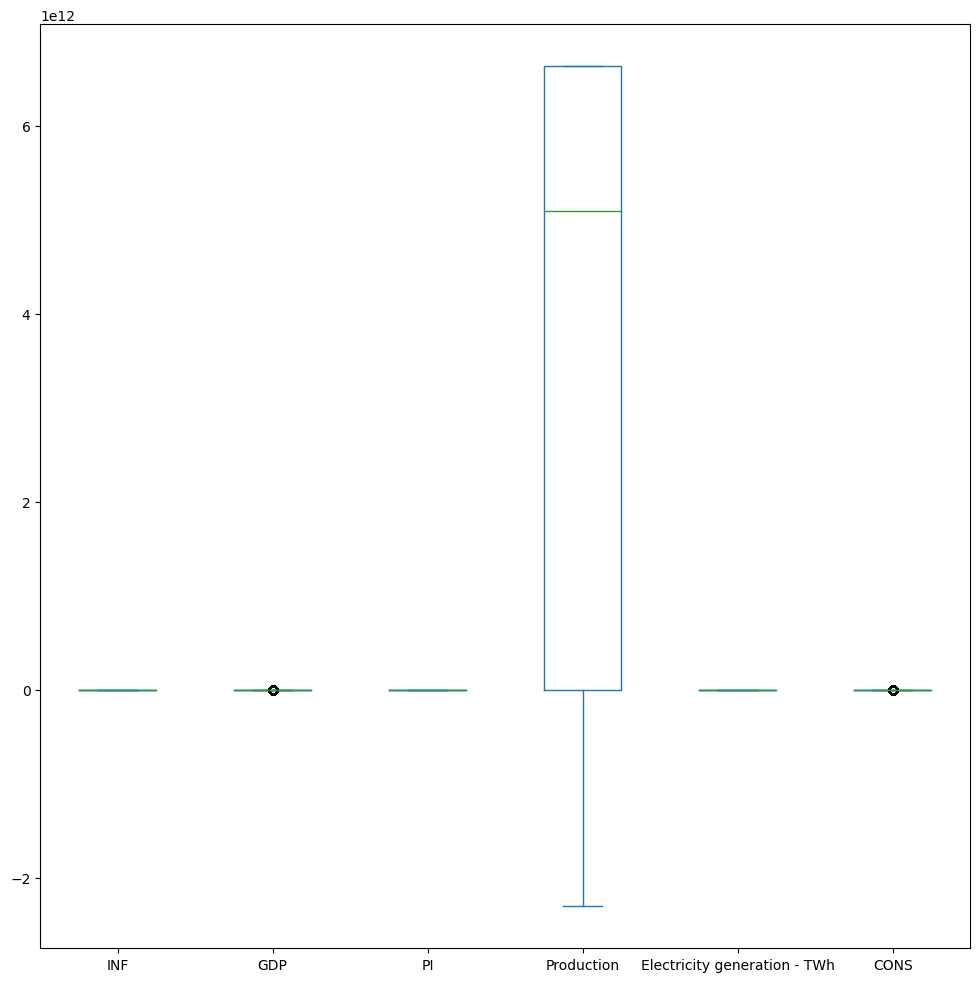

In [95]:
new_df.plot(kind = 'box', vert = True, figsize = (12,12))

In [201]:
merged_df_filled_mean = new_df

In [203]:
# detect or find columns with outliers
def outliers(df):
    outliers_columns = []
    # select numeric column
    num_df = df.select_dtypes(include = 'number')
    for col in num_df.columns:
         q1 = num_df[col].quantile(0.25)
         q3 = num_df[col].quantile(0.75)
         iqr = q3 - q1
         lb = q1 - (1.5*iqr)
         ub = q3 + (1.5*iqr)
         outliers = num_df[col][(num_df[col]<lb)|(num_df[col]>ub)]
         if not outliers.empty:
             outliers_columns.append(col)
    return outliers_columns 

In [209]:
outlier_cols = outliers(merged_df_filled_mean)
print("columns with outliers for train_df are",    outlier_cols)

columns with outliers for train_df are ['GDP', 'CONS']


In [211]:
# handle outliers by capping method
def capping_outliers(df,ft):
    num_df = df.select_dtypes(include = 'number')
    q1 = num_df[ft].quantile(0.25)
    q3 = num_df[ft].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    df[ft] = num_df[ft].clip(lower = lb,upper = ub)
    return df

In [215]:
for col in outlier_cols:
    merged_df_filled_mean  = capping_outliers(merged_df_filled_mean,col)

<Axes: >

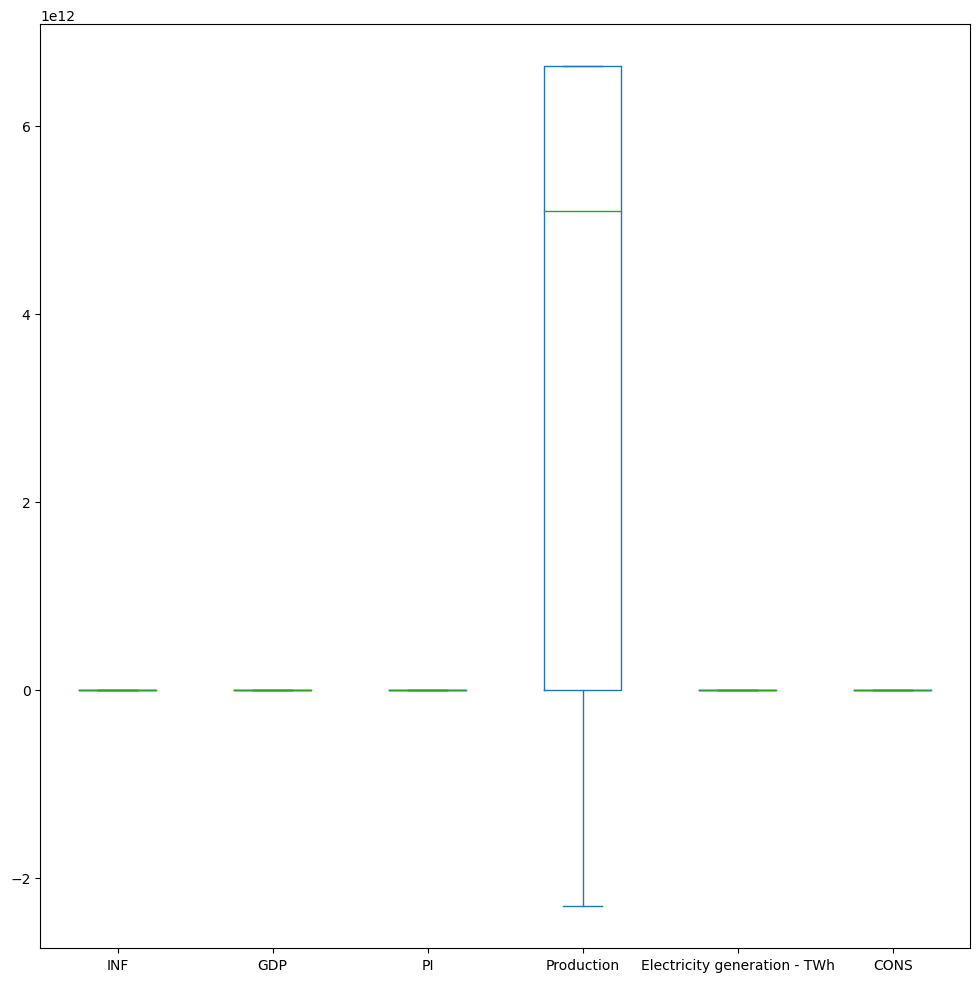

In [217]:
merged_df_filled_mean.plot(kind = 'box', vert = True, figsize = (12,12))

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [220]:
# Identify categorical features
categorical_features = merged_df_filled_mean.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['Country Name']

In [221]:
# Convert categorical features using label encoding
for col in categorical_features:
    le = LabelEncoder()
    merged_df_filled_mean[col] = le.fit_transform(merged_df_filled_mean[col])

In [222]:
merged_df_filled_mean.tail()

,Date,Country Name,INF,GDP,PI,Production,Electricity generation - TWh,CONS
422657,2023-01-01,6,2.215688,6533.351504,15.206323,6.636165e+12,33.55,3952.842408
422658,2023-01-01,6,2.215688,6533.351504,15.206323,0.000000e+00,33.55,3952.842408
422659,2023-01-01,6,2.215688,6533.351504,15.206323,0.000000e+00,33.55,3952.842408
422660,2023-01-01,6,2.215688,6533.351504,15.206323,0.000000e+00,33.55,3952.842408
422661,2023-01-01,6,2.215688,6533.351504,15.206323,6.636165e+12,33.55,3952.842408


In [223]:
from sklearn.preprocessing import StandardScaler

# Check data types
print(merged_df_filled_mean.dtypes)

# Select only numerical columns for scaling
numerical_cols = merged_df_filled_mean.select_dtypes(include=['int32', 'float64']).columns
numerical_df = merged_df_filled_mean[numerical_cols]

# Apply StandardScaler
scaler = StandardScaler()
cleaned_df = scaler.fit_transform(numerical_df)
cleaned_df = pd.DataFrame(cleaned_df, columns=numerical_cols)

print(cleaned_df)

Date                            datetime64[ns]
Country Name                             int32
INF                                    float64
GDP                                    float64
PI                                     float64
Production                             float64
Electricity generation - TWh           float64
CONS                                   float64
dtype: object
        Country Name       INF       GDP        PI  Production  \
0           0.147801  0.444105 -0.226914  0.584059    0.997569   
1           0.147801  0.444105 -0.226914  0.584059    0.997569   
2           0.147801  0.444105 -0.226914  0.584059    0.997569   
3           0.147801  0.444105 -0.226914  0.584059    0.997569   
4           0.147801  0.444105 -0.226914  0.584059    0.997569   
...              ...       ...       ...       ...         ...   
133819      1.617145  0.093847 -0.856175  0.584059    0.997569   
133820      1.617145  0.093847 -0.856175  0.584059   -1.015491   
133821      1.61

   Country Name       INF       GDP        PI  Production  \
0      0.147801  0.444105 -0.226914  0.584059    0.997569   
1      0.147801  0.444105 -0.226914  0.584059    0.997569   
2      0.147801  0.444105 -0.226914  0.584059    0.997569   
3      0.147801  0.444105 -0.226914  0.584059    0.997569   
4      0.147801  0.444105 -0.226914  0.584059    0.997569   

   Electricity generation - TWh          CONS  
0                     -1.196531  2.273737e-12  
1                     -1.196531  2.273737e-12  
2                     -1.196531  2.273737e-12  
3                     -1.196531  2.273737e-12  
4                     -1.196531  2.273737e-12  


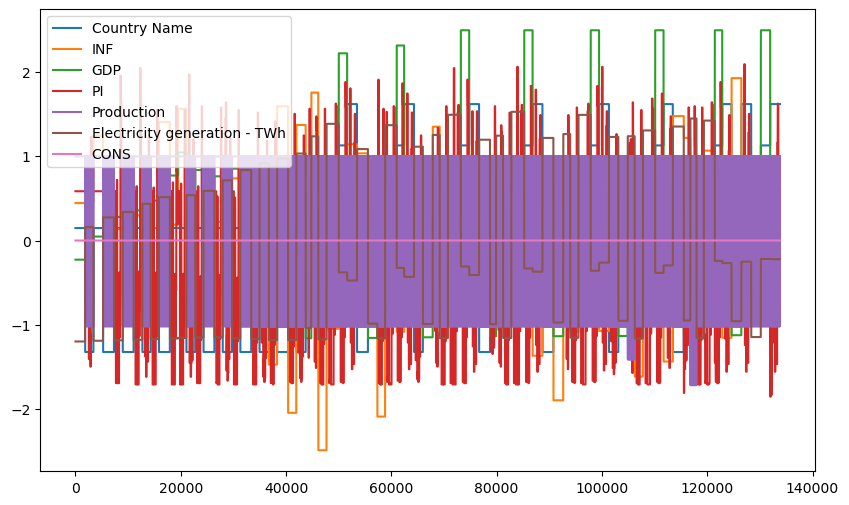

In [227]:


# Display the first few rows of the DataFrame
print(cleaned_df.head())

# Plot the time series
cleaned_df.plot(figsize=(10, 6))
plt.show()

In [230]:
# Select target variable
series = cleaned_df['Electricity generation - TWh']  # Replace 'Target' with the actual column name

In [231]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("The series is non-stationary. Differencing is required.")
else:
    print("The series is stationary.")

ADF Statistic: -8.073179507128637
p-value: 1.5300367228393898e-12
The series is stationary.


In [232]:
# First differencing
series_diff = series.diff().dropna()


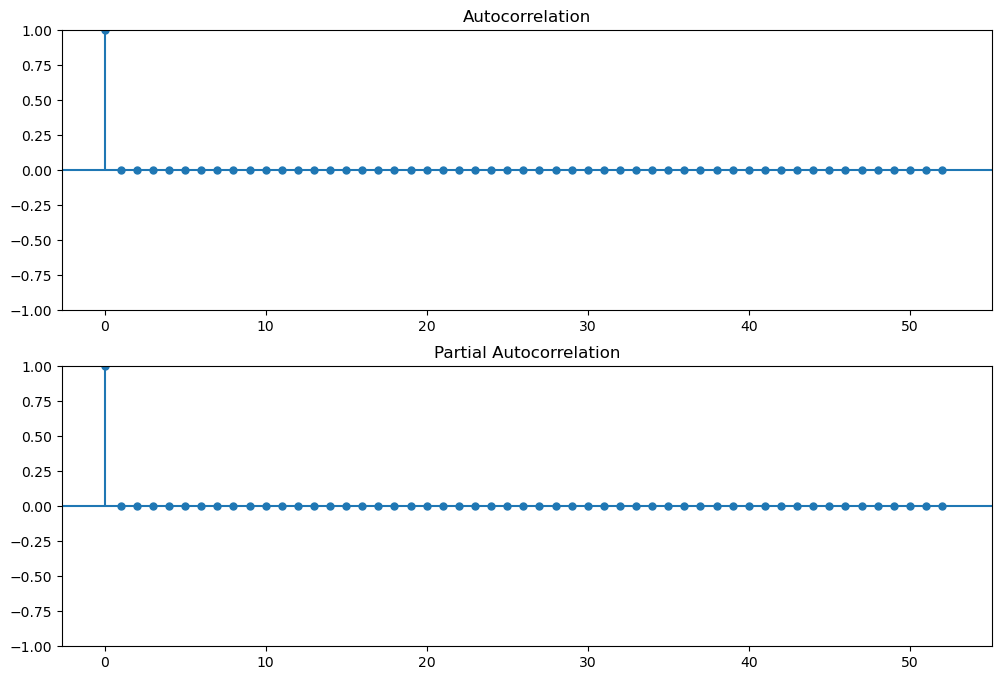

In [233]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(series_diff, ax=ax[0])
plot_pacf(series_diff, ax=ax[1])
plt.show()

In [234]:
from statsmodels.tsa.arima.model import ARIMA
# Define your target variable

series = cleaned_df['Electricity generation - TWh']  # Replace with your actual target column name
# Fit ARIMA model
model = ARIMA(series, order=(0,1,0))  # Replace (p, d, q) with your parameters
results = model.fit()

# Forecasting
forecast = results.get_forecast(steps=12)
forecast_df = forecast.summary_frame()

print(forecast_df)

Electricity generation - TWh      mean   mean_se  mean_ci_lower  mean_ci_upper
133824                       -0.220984  0.043892      -0.307010      -0.134957
133825                       -0.220984  0.062072      -0.342643      -0.099324
133826                       -0.220984  0.076023      -0.369986      -0.071982
133827                       -0.220984  0.087784      -0.393036      -0.048931
133828                       -0.220984  0.098145      -0.413344      -0.028623
133829                       -0.220984  0.107513      -0.431704      -0.010263
133830                       -0.220984  0.116127      -0.448588       0.006621
133831                       -0.220984  0.124145      -0.464303       0.022336
133832                       -0.220984  0.131675      -0.479063       0.037095
133833                       -0.220984  0.138798      -0.493023       0.051056
133834                       -0.220984  0.145573      -0.506301       0.064333
133835                       -0.220984  0.152046    

In [235]:
actual_values = series[0:]  # Skip the first value due to differencing
predicted_values = results.fittedvalues

In [236]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming `series` and `results.fittedvalues` are defined
actual_values = series[0:]  # Adjust indices as necessary
predicted_values = results.fittedvalues

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.0009620842185775072
Mean Squared Error (MSE): 0.0019371883582273955
R² Score: 0.9980628116417726
